<a id='toc'></a>
# Initial Exploratory Data Analysis

1. [Setting up the Environment](#envir)
1. [Loading the Updated *app* Dataframe](#load)
1. [Checking Missing Values](#miss)
1. [Understanding the Data](#data)
    1. [The TARGET Attribute](#target)
    1. [Categorical Attributes](#cat)
    1. [Numerical Attributes](#num)

<a id='envir'></a>
# 1. Setting up the Environment

[Return](#toc)

In [1]:
import numpy as np
import pandas as pd
from numpy import nan as NaN
import matplotlib.pyplot as plt
import seaborn as sns
#import os
import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_rows = 200
pd.options.display.max_columns = 200
%matplotlib inline

<a id='load'></a>
# 2. Loading the Updated *app* Dataframe

[Return](#toc)

In [2]:
# Reading in the updated data with the new attributes
path = 'C:/Users/Richard/Documents/A_Documents/Cap_Data/CSV'
app = pd.read_csv(path + '/app_with_features/app_features.csv')
print('Shape of the updated app dataframe ' + str(app.shape))

Shape of the updated app dataframe (307511, 191)


<a id='miss'></a>
# 3. Checking Missing Values
We've added a lot of new attributes to our main dataframe *app*. Let's check the amount of missing values once more. 

[Return](#toc)

In [3]:
# Count attributes and observations with missing values
def missing_values(df, name, p, q):
    """ 
    Function to calculate number of missing values in attributes and observations.
    df: dataframe
    names: name of dataframe
    p: theshold used to calculate number of attributes with missing values > p%
    q: theshold used to calculate number of observations with missing values > q%
    """
    # Set up empty dataframe to hold results
    results = pd.DataFrame(index = ['Attributes', 'Attributes with Missing Values', 'Attributes with Missing Values > '+str(p)+'%', \
                                   'Observations', 'Observations with Missing Values', 'Observations with Missing Values > '+str(q)+'%'])
    
    # Number of columns
    cols = df.shape[1]
    # Calculate number of missing values in each column
    no_mis_val_in_col = df.isnull().sum()  #sum() acts on cols in dataframe -> defaults to sum(axis=0)
    #Count number of cols with missing values
    no_col_with_mis_val = sum(no_mis_val_in_col != 0)
    # Calculate % of missing values in each column
    percent_mis_val_in_col = round(no_mis_val_in_col / len(df) * 100, 1) 
    # Calculate number of cols with missing values > p%
    no_cols_greater_p = sum(percent_mis_val_in_col > p)
    
    # Number of rows
    rows = len(df)
    # Calculate number of missing values in each row
    no_mis_val_in_row = df.isnull().sum(axis = 1)
    # Count number of rows with missing values
    no_rows_with_mis_val = np.count_nonzero(no_mis_val_in_row)
    # Calculate % of missing values in each row
    percent_mis_val_in_row = round(no_mis_val_in_row / cols * 100, 1)
    # Calculate number of rows with missing values > q%
    no_rows_greater_p = np.count_nonzero(percent_mis_val_in_row > q)
    
    
    results[name] = [cols, no_col_with_mis_val, no_cols_greater_p, rows, no_rows_with_mis_val, no_rows_greater_p]
    return results

p = 60
q = 50
missing_values(app, 'app', p, q)

,app
Attributes,191
Attributes with Missing Values,158
Attributes with Missing Values > 60%,17
Observations,307511
Observations with Missing Values,301609
Observations with Missing Values > 50%,43495


The increase in observations with missing values above 50% (from 0 in the original *app* dataframe) is due to the newly created attributes we created from the *bureau* and *bureau_balance* dataframes. There are observations in *app* that do not have data in *bureau* or *bureau_balance*. These are the observations that now have the increased number of missing values.

In [4]:
# Function to show number and percentage of missing missing values (above p%) by column name
def att_missing_values(df, p):
    #Calculate number of missing values in each column
    no_mis_val_in_col = df.isnull().sum()
    #Calculate percentage of missing values in each column
    percent_mis_val_in_col = round(no_mis_val_in_col / len(df) * 100, 1)
    #Put results in a dataframe
    results = pd.DataFrame({'Number':no_mis_val_in_col, "Percent (%)":percent_mis_val_in_col}, index = df.columns)
    # Filter out attributes with missing values below p%
    results = results[results['Percent (%)']>=p]
    return results

p=60
print("Attributes with Missing Values >= "+str(p)+"%\n")
print(att_missing_values(app, p).sort_values(by='Percent (%)', ascending=False))

Attributes with Missing Values >= 60%

                          Number  Percent (%)
COMMONAREA_MEDI           214865         69.9
COMMONAREA_AVG            214865         69.9
COMMONAREA_MODE           214865         69.9
NONLIVINGAPARTMENTS_MEDI  213514         69.4
NONLIVINGAPARTMENTS_AVG   213514         69.4
NONLIVINGAPARTMENTS_MODE  213514         69.4
FONDKAPREMONT_MODE        210295         68.4
LIVINGAPARTMENTS_AVG      210199         68.4
LIVINGAPARTMENTS_MEDI     210199         68.4
LIVINGAPARTMENTS_MODE     210199         68.4
FLOORSMIN_MEDI            208642         67.8
FLOORSMIN_MODE            208642         67.8
FLOORSMIN_AVG             208642         67.8
YEARS_BUILD_MEDI          204488         66.5
YEARS_BUILD_AVG           204488         66.5
YEARS_BUILD_MODE          204488         66.5
OWN_CAR_AGE               202929         66.0


The attributes with a high number of missing values remains the same. None of our newly created attributes have a high number of missing values.

<a id='data'></a>
# 4. Understanding the Data

[Return](#toc)

<a id='target'></a>
## A. The TARGET Attribute
Recall that the TARGET attribute is imbalanced with just over 8% labelled as default (i.e. equal to 1).

[Return](#toc)

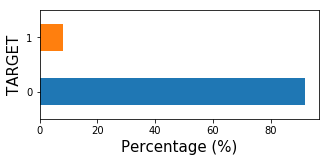

In [5]:
t = app['TARGET'].value_counts(dropna=False)/len(app)*100
t.plot.barh(figsize=(5,2));plt.xlabel('Percentage (%)', fontsize=15); plt.ylabel('TARGET', fontsize=15);

<a id='cat'></a>
## B. Categorical Attributes
Let's look at the percentage of defaults occuring for the different levels within some categorical attributes.

[Return](#toc)

In [6]:
def cat_default(df, y_var, title):
    '''
    A function to plot the percentage of defaults occuring within each level of a categorical attribute.
    df: dataframe (only really works with 'app')
    y_var: name of categorical attribute
    title: chart title
    '''
    temp = pd.crosstab(df[y_var], df['TARGET'])
    temp = temp.div(temp.sum(axis=1), axis=0)[1].sort_values(ascending=False)
    sns.barplot(temp.values*100, temp.index)
    plt.title(title, fontsize = 15)
    plt.xlabel('Percentage Defaulting (%)', fontsize=15)
    plt.ylabel(y_var, fontsize=15)
    plt.xticks(rotation=30)
    
def cat_counts(df, y_var, title):
    '''
    A function to plot the counts of each level of a categorical attribute.
    df: dataframe
    y_var: name of categorical attribute
    title: chart title
    '''
    temp = df[y_var].value_counts().sort_values(ascending=False)
    sns.barplot(temp.values, temp.index)
    plt.title(title, fontsize = 15)
    plt.xlabel('Count', fontsize=15)
    plt.ylabel(y_var, fontsize=15)
    plt.xticks(rotation=30)


In [7]:
def scatter(df, y_var, title, fig_size):
    '''
    A function to plot the counts of each level of a categorical attribute against the percentage of defualts for that level.
    df: dataframe (only really works with 'app')
    y_var: name of categorical attribute
    title: chart title
    fig_size: size of plot
    '''
    # Calculating the default percentage within each level
    default_percent = pd.crosstab(df[y_var], df['TARGET'])
    default_percent = default_percent.div(default_percent.sum(axis=1), axis=0)[[1]]*100 # Note great code - the [1] reference pulls column '1' which is the default column.
    
    # Calculating the level counts
    counts = df[y_var].value_counts()

    # Joing the data into a dataframe and plotting the scatter plot
    temp = pd.merge(pd.DataFrame(counts), default_percent, right_index=True, left_index=True, how='outer').fillna(0)
    temp.columns = ['Count', 'Default_Percent']
    plt.figure(figsize = fig_size)
    sns.scatterplot(x="Count", y="Default_Percent", data=temp)
    #plt.ylim(0)
    #plt.xlim(0)
    plt.title(title, fontsize=15)
    plt.xlabel('Count', fontsize=15)
    plt.ylabel('Default_Percent', fontsize=15)

    # Iterating through the plotted points and labelling with the 'level name'
    for i in range(len(temp)):
        plt.annotate(temp.index[i], (temp['Count'][i]+1000, temp['Default_Percent'][i]));

### Gender
There are significantly more woman applicants than men. Also, woman appear to be less likely to default than men.

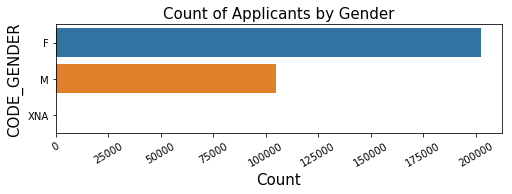

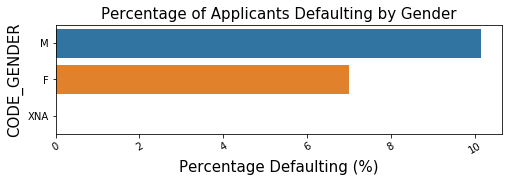

In [8]:
plt.figure(figsize = (8,2))
cat_counts(app, 'CODE_GENDER', 'Count of Applicants by Gender')
plt.figure(figsize = (8,2))
cat_default(app, 'CODE_GENDER', 'Percentage of Applicants Defaulting by Gender')

### Occupation
'Laborers', 'Sales staff' and 'Drivers' look to be creating higher risk for the business as they make up a large portion of applicants and they have a higher rate of default around 10~11%. The business should consider changing the mix of applicants by targeting occupations currently with low volume and lower risk of default such as 'IT staff' and 'HR staff'.

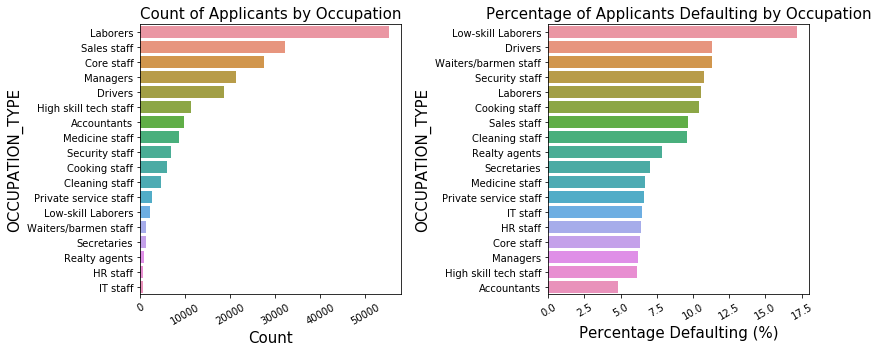

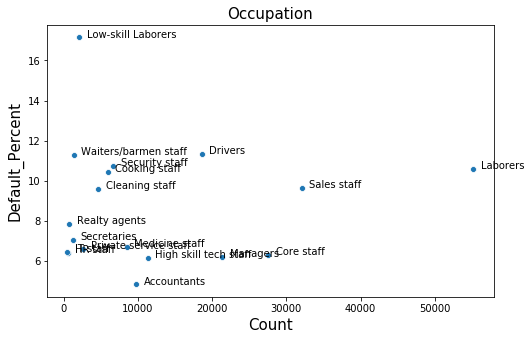

In [9]:
plt.subplots(1, 2, figsize=(12,5))
plt.subplot(1,2,1)
cat_counts(app, 'OCCUPATION_TYPE', 'Count of Applicants by Occupation')
plt.subplot(1,2,2)
cat_default(app, 'OCCUPATION_TYPE', 'Percentage of Applicants Defaulting by Occupation')
plt.tight_layout()
scatter(app, 'OCCUPATION_TYPE', 'Occupation', (8,5))

### Organization Type
Two of the high volume organization types, 'Business Entity Type 3' and 'Self-employed', have higher defaults rates in the range 9~10%. The business should attempt to reduce the volume of these organization types.

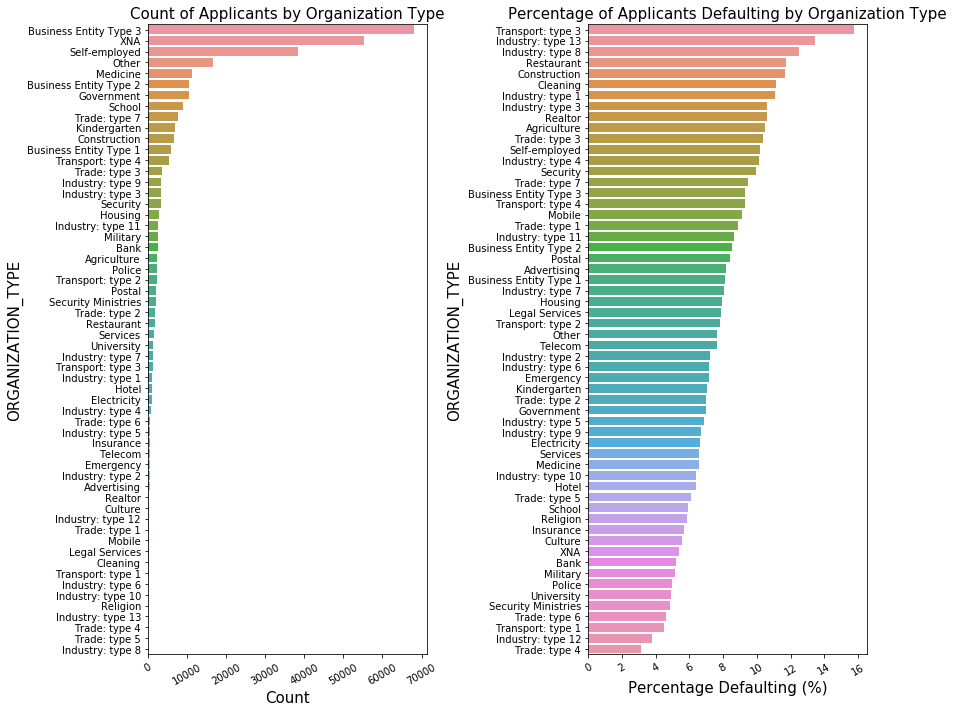

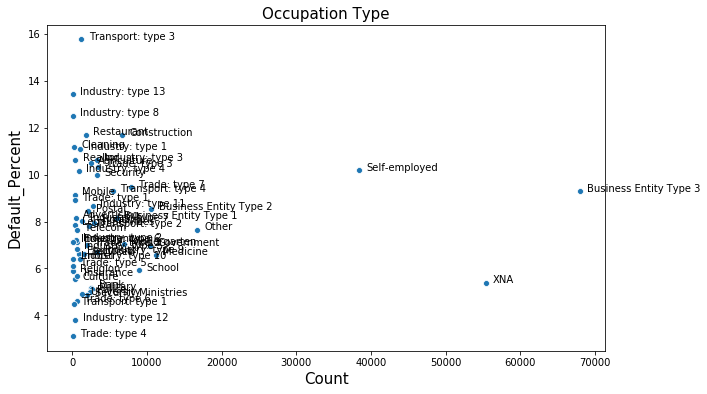

In [10]:
plt.subplots(1, 2, figsize=(13,10))
plt.subplot(1,2,1)
cat_counts(app, 'ORGANIZATION_TYPE', 'Count of Applicants by Organization Type')
plt.subplot(1,2,2)
cat_default(app, 'ORGANIZATION_TYPE', 'Percentage of Applicants Defaulting by Organization Type')
plt.tight_layout()
scatter(app, 'ORGANIZATION_TYPE', 'Occupation Type', (10,6))

### Family Status
'Married' applicants make up the majority of all applicants and have a lower than average default rate below 8%. The business should continue to focus on these applicants.

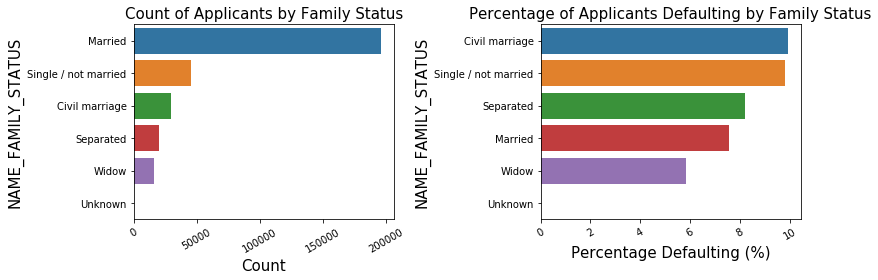

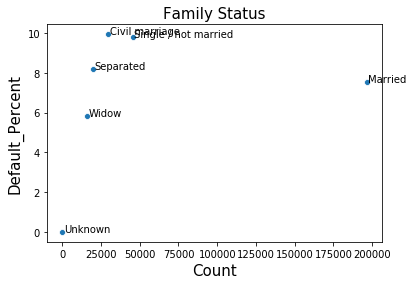

In [11]:
plt.subplots(1, 2, figsize=(12,4))
plt.subplot(1,2,1)
cat_counts(app, 'NAME_FAMILY_STATUS', 'Count of Applicants by Family Status')
plt.subplot(1,2,2)
cat_default(app, 'NAME_FAMILY_STATUS', 'Percentage of Applicants Defaulting by Family Status')
plt.tight_layout()
scatter(app, 'NAME_FAMILY_STATUS', 'Family Status', (6,4))

### Week Day Application was Started - just for fun!
While they make up a smaller proportion of applicants, those started on a weekend tend to have lower than average default rates. Perhaps indicating people too busy at work during the week to make an application?

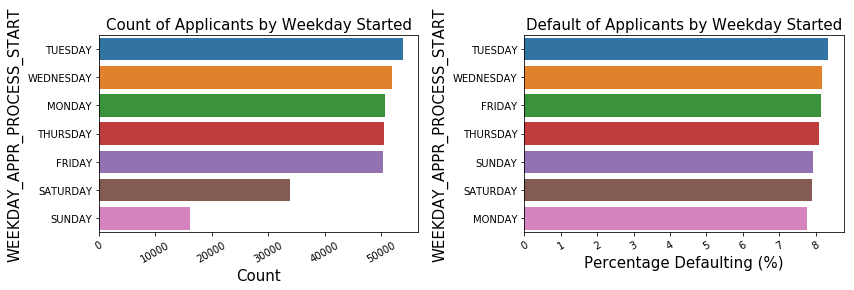

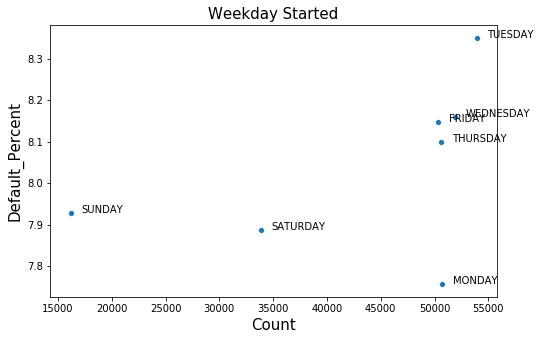

In [12]:
var = 'WEEKDAY_APPR_PROCESS_START'
plt.subplots(1, 2, figsize=(12,4))
plt.subplot(1,2,1)
cat_counts(app, var, 'Count of Applicants by Weekday Started')
plt.subplot(1,2,2)
cat_default(app, var, 'Default of Applicants by Weekday Started')
plt.tight_layout()
scatter(app, var, 'Weekday Started', (8,5))

<a id='num'></a>
## C. Numerical Attributes

[Return](#toc)

### Density Plots for Original Attributes 
Let's look at the density plots for some numerical attributes split by default and non-default. A difference in the distributions may indicate an attribute with predictive power.

There is no obviously significant difference in the density plots within the set below.

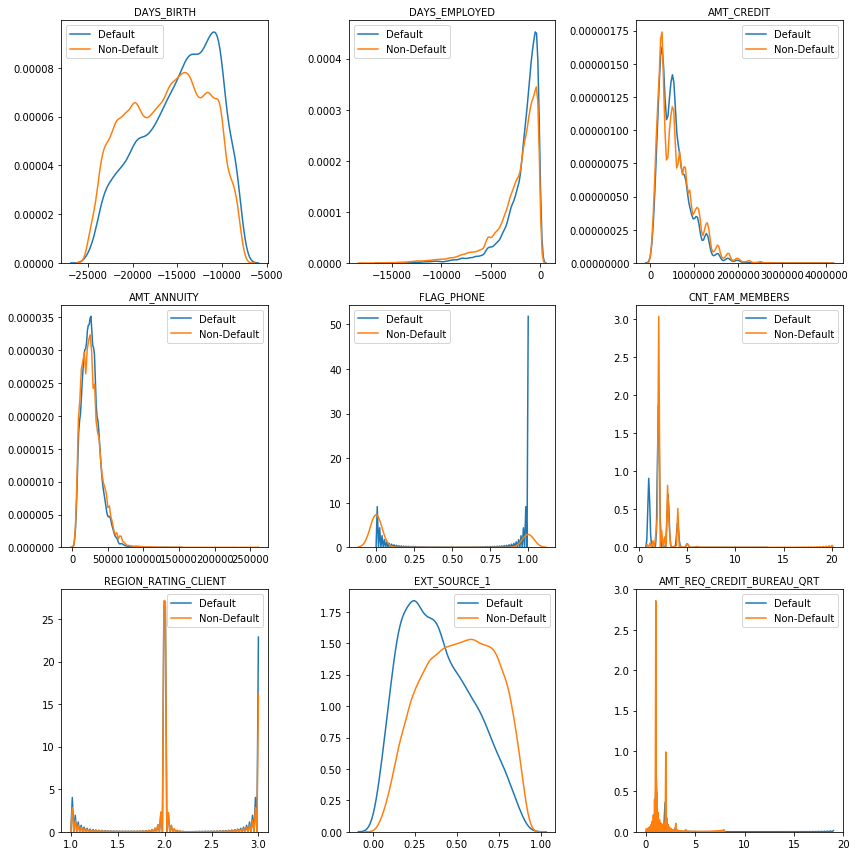

In [13]:
# Setting up a 3 x 3 plot
fig = plt.subplots(3,3, figsize=(12,12))

# Iterating over nine numerical attributes and plotting density functions split by default and non-default
for i, var in enumerate(['DAYS_BIRTH', 'DAYS_EMPLOYED', 'AMT_CREDIT', 'AMT_ANNUITY', 'FLAG_PHONE','CNT_FAM_MEMBERS', \
                         'REGION_RATING_CLIENT', 'EXT_SOURCE_1', 'AMT_REQ_CREDIT_BUREAU_QRT']):
    plt.subplot(3,3,i+1)
    plt.title(var, fontsize=10)
    sns.kdeplot(app.loc[app['TARGET']==1, var], label='Default')
    sns.kdeplot(app.loc[app['TARGET']==0, var], label='Non-Default')

# Adjusting spacing between plots to stop overlaps    
plt.tight_layout() 

### Density Plots for Engineered Attributes 
The distributions are erratic but there does appear to be some areas of difference between the default and non-default distributions. For example, within *'bureau_STATUS_2_count'*, the default distribution has a higher concentration of observations at the 1 and 2 counts. The non-default distribution appears to be much more skewed to the right with a long thin tail. Perhaps these attributes will have some predictive power?

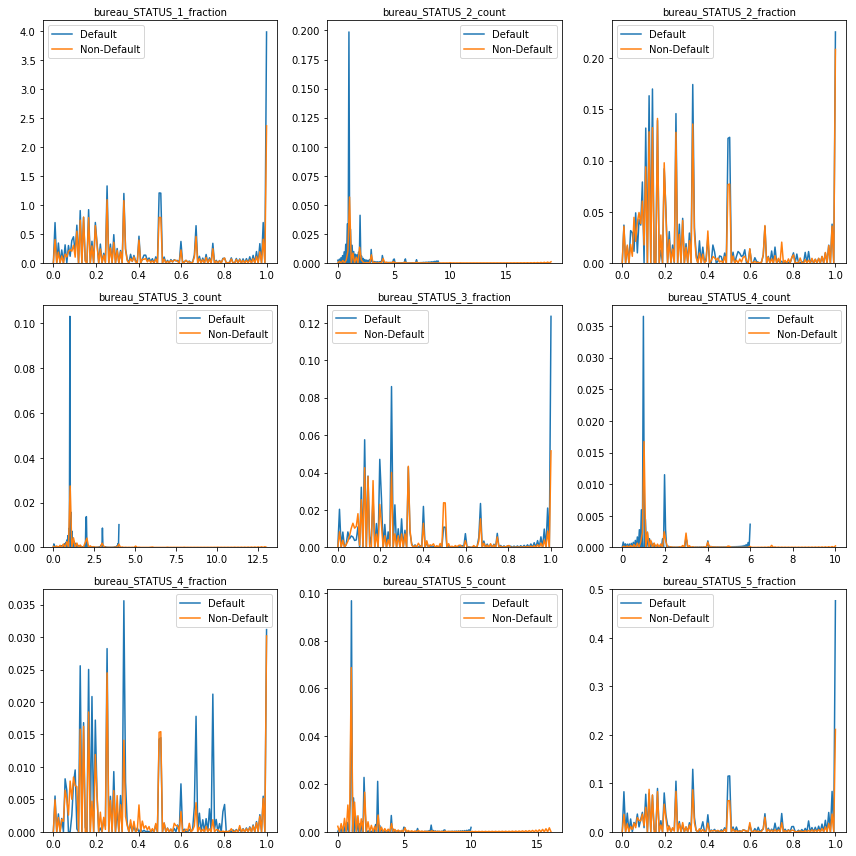

In [14]:
# Setting up a 3 x 3 plot
fig = plt.subplots(3,3, figsize=(12,12))

# Iterating over nine engineered attributes and plotting density functions split by default and non-default
for i, var in enumerate(app.columns[-15:-6]):
    plt.subplot(3,3,i+1)
    plt.title(var, fontsize=10)
    sns.kdeplot(app.loc[app['TARGET']==1, var], label='Default')
    sns.kdeplot(app.loc[app['TARGET']==0, var], label='Non-Default')

# Adjusting spacing between plots to stop overlaps    
plt.tight_layout() 

### Age
Let's check the default rate by age. First, we need to convert the DAYS_BIRTH attribute to years and then 'bucket'. Clearly there's a correlation between age and default rate. Younger applicants are more likely to default. The age range from 25 to 35 years represents the largest risk to the business with a high number of applicants and higher than average defaults rates. The 20 to 25 years has the highest default rate but only represents a small portion of all applicants.

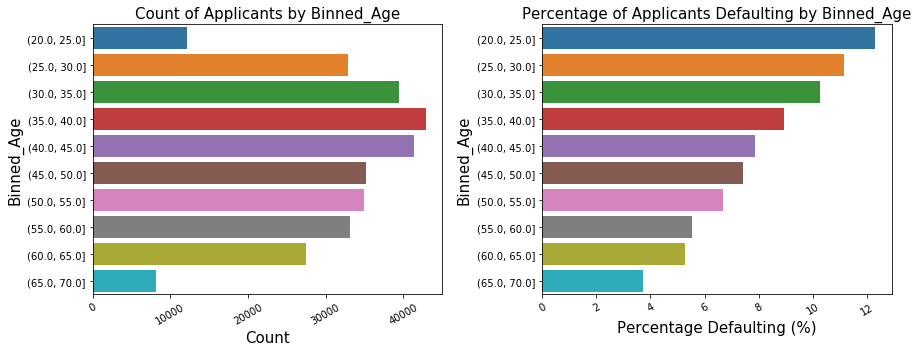

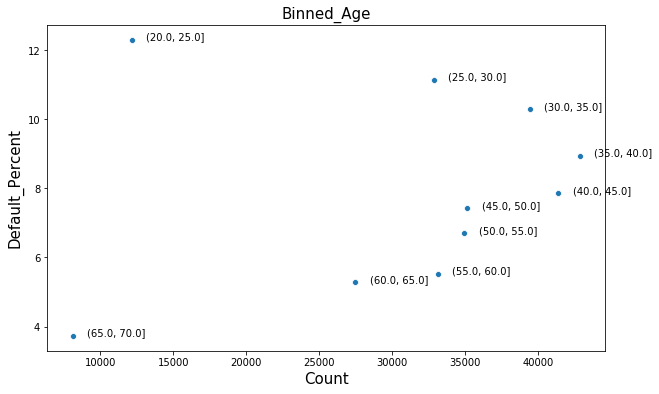

In [15]:
# Extracting and bucketing the data
data = app[['DAYS_BIRTH', 'TARGET']]
data['Age'] = data['DAYS_BIRTH']/-365
data['Binned_Age'] = pd.cut(data['Age'], bins=np.linspace(20, 70, num = 11))
#data['Binned_Age'] = pd.cut(data['Age'], bins=11)

# Plotting using our earlier functions
var = 'Binned_Age'
plt.subplots(1, 2, figsize=(13,5))
plt.subplot(1,2,1)
cat_counts(data, var, 'Count of Applicants by '+var)
plt.subplot(1,2,2)
cat_default(data, var, 'Percentage of Applicants Defaulting by '+var)
plt.tight_layout()
scatter(data, var, var, (10,6))


### Total Income
The lower income segments make up the majority of applicants and have the highest default rates in line with the overall average. This is to be expected given the business model of Home Credit B.V. 

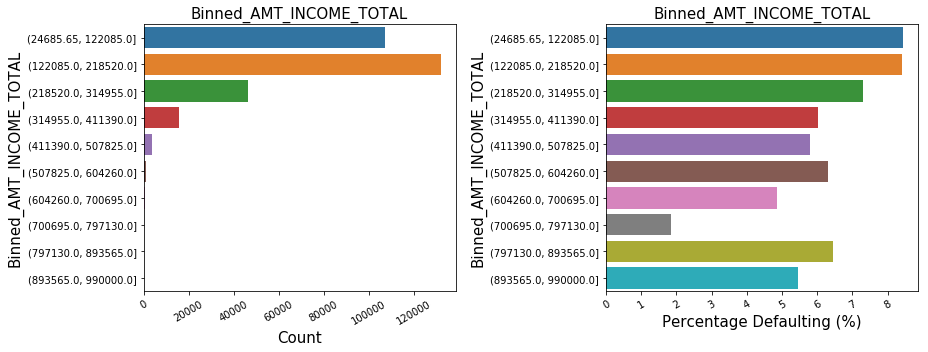

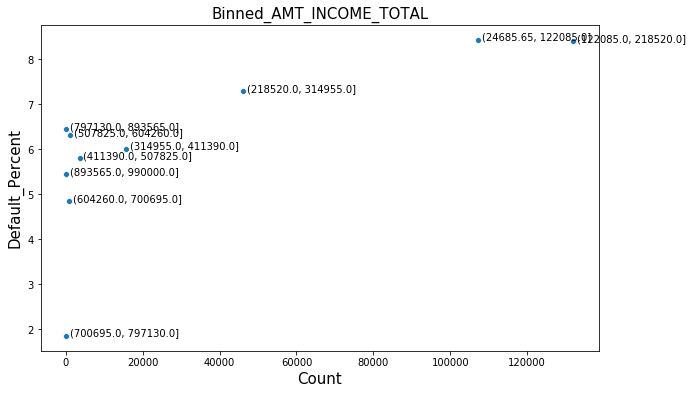

In [16]:
var = 'AMT_INCOME_TOTAL'
# Extracting and bucketing the data
data = app.loc[app[var]<1000000, [var, 'TARGET']]
data['Binned_'+var] = pd.cut(data[var], bins=10)

# Plotting using our earlier functions
var2 = 'Binned_'+var
plt.subplots(1, 2, figsize=(13,5))
plt.subplot(1,2,1)
cat_counts(data, var2, var2)
plt.subplot(1,2,2)
cat_default(data, var2, var2)
plt.tight_layout()
scatter(data, var2, var2, (10,6))

### Regional Population
The default rate tends to drop as the relative population rises. The largest portion of applicants comes from the lower population areas suggesting Home Credit B.V. may be doing most of its business in rural areas and small towns. 

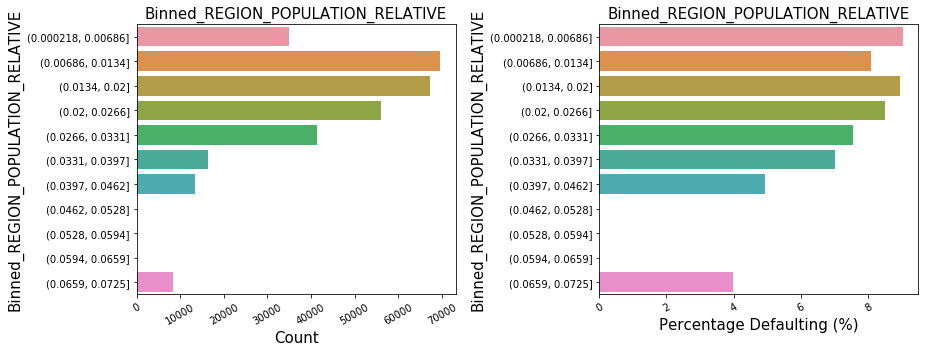

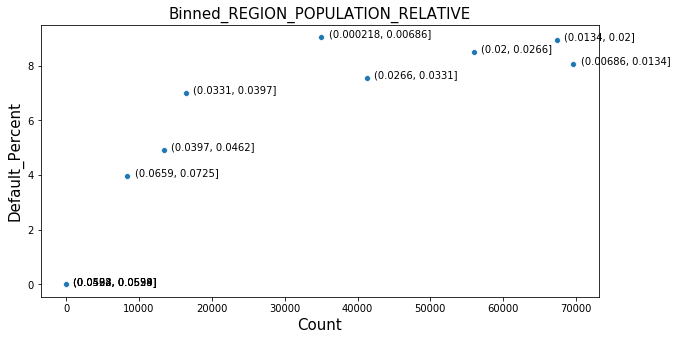

In [17]:
var = 'REGION_POPULATION_RELATIVE'
# Extracting and bucketing the data
data = app.loc[app[var]>=0, [var, 'TARGET']]
data['Binned_'+var] = pd.cut(data[var], bins=11)

# Plotting using our earlier functions
var2 = 'Binned_'+var
plt.subplots(1, 2, figsize=(13,5))
plt.subplot(1,2,1)
cat_counts(data, var2, var2)
plt.subplot(1,2,2)
cat_default(data, var2, var2)
plt.tight_layout()
scatter(data, var2, var2, (10,5))

### Number of Enquiries to Credit Bureau
This attribute shows the number of past enquiries to a credit bureau during the 12-month period beginning 3 months ago. There's a general increase in default rate as the number of enquiries increases, perhaps indicating that applicants with a high enquiry count are struggling to find credit and 'shopping around'. Home Credit B.V. appears to be doing a good job of focussing on applicants with lower default rates and lower enquiry counts.

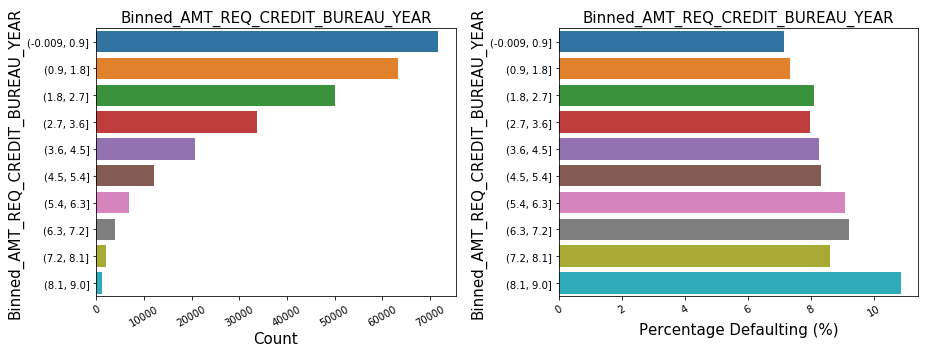

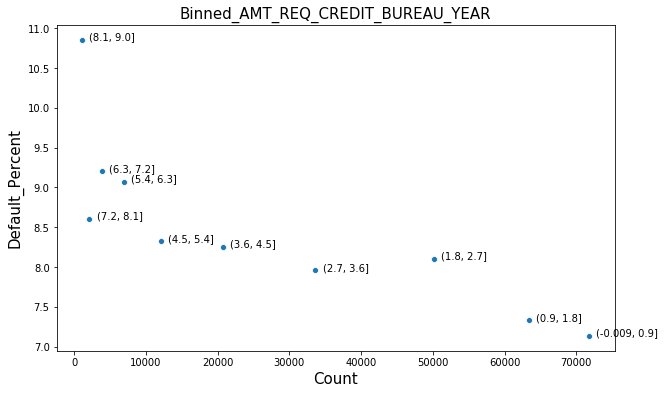

In [18]:
var = 'AMT_REQ_CREDIT_BUREAU_YEAR'
# Extracting and bucketing the data
data = app.loc[app[var]<10, [var, 'TARGET']]
data['Binned_'+var] = pd.cut(data[var], bins=10)

# Plotting using our earlier functions
var2 = 'Binned_'+var
plt.subplots(1, 2, figsize=(13,5))
plt.subplot(1,2,1)
cat_counts(data, var2, var2)
plt.subplot(1,2,2)
cat_default(data, var2, var2)
plt.tight_layout()
scatter(data, var2, var2, (10,6))